Data Extraction

In [2]:
from fredapi import Fred
import pandas as pd
import numpy as np
fred = Fred(api_key='15239f57043248d46a380db5710b0e65')

#US Unemployment Rate Seasonally Adjusted
unrate_sa = fred.get_series('UNRATE')
#US Unemployment Rate Not Seasonally Adjusted
unrate_nsa = fred.get_series('UNRATENSA')
#The reason we need both is because the race series are not seasonally adjusted

In [3]:
#US Unemployment Rate - Women Seasonally Adjusted
women = fred.get_series('LNS14000002')
#US Unemployment Rate - Men Seasonally Adjusted
men = fred.get_series('LNS14000001')

In [4]:
#US Unemployment Rate - Black/African American Not Seasonally Adjusted
black = fred.get_series('LNU04000006')
#US Unemployment Rate - Hispanic Not Seasonally Adjusted
hispanic = fred.get_series('LNU04000009')
#US Unemployment Rate - White Not Seasonally Adjusted
white = fred.get_series('LNU04000003')

In [5]:
#Release is State Employment and Unemployment
release = fred.search_by_release(112)
#Cutting down to only Unemployment Rate data
release = release[release['title'].str.startswith('Unemployment Rate')]
#Getting rid of erraneous entries that aren't specifically the 50 states
release = release[~release['title'].str.endswith('Region')]
release = release[~release['title'].str.endswith('Division')]
release = release[~release['title'].str.endswith('division')]
release = release[~release['title'].str.endswith('(DISCONTINUED)')]
release = release[~release['title'].str.endswith('District of Columbia')]
release = release[~release['title'].str.endswith('Puerto Rico')]

#Cutting all Not Seasonally Adjusted Series
states = release[release['seasonal_adjustment'].str.startswith('Seasonally')]

In [6]:
states

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
AKUR,AKUR,2024-11-29,2024-11-29,Unemployment Rate in Alaska,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:08-06:00,25,None
ALUR,ALUR,2024-11-29,2024-11-29,Unemployment Rate in Alabama,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:04-06:00,38,None
ARUR,ARUR,2024-11-29,2024-11-29,Unemployment Rate in Arkansas,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:11-06:00,27,None
AZUR,AZUR,2024-11-29,2024-11-29,Unemployment Rate in Arizona,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:06-06:00,33,None
CAUR,CAUR,2024-11-29,2024-11-29,Unemployment Rate in California,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:02-06:00,64,None
COUR,COUR,2024-11-29,2024-11-29,Unemployment Rate in Colorado,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:06-06:00,34,None
CTUR,CTUR,2024-11-29,2024-11-29,Unemployment Rate in Connecticut,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:14-06:00,19,None
DEUR,DEUR,2024-11-29,2024-11-29,Unemployment Rate in Delaware,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:13-06:00,16,None
FLUR,FLUR,2024-11-29,2024-11-29,Unemployment Rate in Florida,1976-01-01,2024-10-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-11-20 10:50:03-06:00,51,None


In [7]:
dict = {}
#Going through the Dataframe to get all the series ids
for state in states['id']:
    dict[state[0:2]]=fred.get_series(states['id'][state])
#Building a new DataFrame with all the data we need
states_df = pd.DataFrame(dict)

In [8]:
states_df

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1976-01-01,7.1,6.6,7.3,10.2,9.2,5.8,9.8,8.0,9.7,8.4,...,3.3,6.0,5.8,5.8,6.1,8.6,8.5,5.8,7.5,4.1
1976-02-01,7.1,6.6,7.3,10.2,9.2,5.7,9.8,8.0,9.7,8.4,...,3.3,6.0,5.8,5.9,6.1,8.6,8.5,5.8,7.5,4.1
1976-03-01,7.0,6.6,7.3,10.1,9.1,5.7,9.8,8.0,9.6,8.4,...,3.2,6.0,5.9,5.8,6.1,8.6,8.4,5.7,7.5,4.1
1976-04-01,6.9,6.5,7.2,10.0,9.1,5.6,9.6,8.1,9.5,8.3,...,3.1,6.0,5.9,5.8,6.0,8.6,8.5,5.6,7.5,4.0
1976-05-01,6.9,6.4,7.1,9.8,9.0,5.6,9.4,8.3,9.3,8.1,...,3.1,5.9,5.9,5.7,5.9,8.5,8.5,5.5,7.4,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-01,4.5,2.9,3.3,3.3,5.2,3.8,3.9,4.0,3.3,3.3,...,2.0,3.0,4.0,3.0,2.7,2.1,4.8,2.9,4.1,2.9
2024-07-01,4.5,2.8,3.3,3.4,5.2,3.9,3.6,4.1,3.3,3.4,...,2.0,3.0,4.1,3.2,2.7,2.1,4.9,3.0,4.2,2.9
2024-08-01,4.6,2.8,3.3,3.4,5.3,4.0,3.4,4.2,3.3,3.6,...,2.0,3.1,4.1,3.3,2.8,2.2,4.8,2.9,4.2,3.0
2024-09-01,4.5,2.9,3.3,3.5,5.3,4.0,3.2,4.2,3.3,3.6,...,2.0,3.2,4.1,3.5,2.9,2.2,4.8,2.9,4.2,3.1


Statistical Analysis

In [10]:
from scipy import stats

print(stats.shapiro(unrate_sa))
print(stats.shapiro(unrate_nsa))

ShapiroResult(statistic=0.9544867061302104, pvalue=2.6741763212280044e-16)
ShapiroResult(statistic=0.9606940769845876, pvalue=4.9162510718848285e-15)


We can conclude that the unemployment rates are probably not normally distributed, therefore we cannot use tests that assume a normal distribution. We will instead proceed with using the Kruskal-Wallis H Test and Mann-Whitney U Test

Discriminating Factors: Gender

In [13]:
print(stats.kruskal(unrate_sa, women, men))
print(stats.mannwhitneyu(women,men))

KruskalResult(statistic=36.890619725634984, pvalue=9.756717031619657e-09)
MannwhitneyuResult(statistic=492721.0, pvalue=3.1997531708271427e-09)


These tests suggest that there is a significant difference between the unemployment rates for men and women in the US overall since 1948

In [15]:
df_gen = pd.concat([unrate_sa, women, men], axis=1)
df_gen.columns = ['Unemployment Rate', 'Unemployment Rate - Women', 'Unemployment Rate - Men']

<BarContainer object of 3 artists>

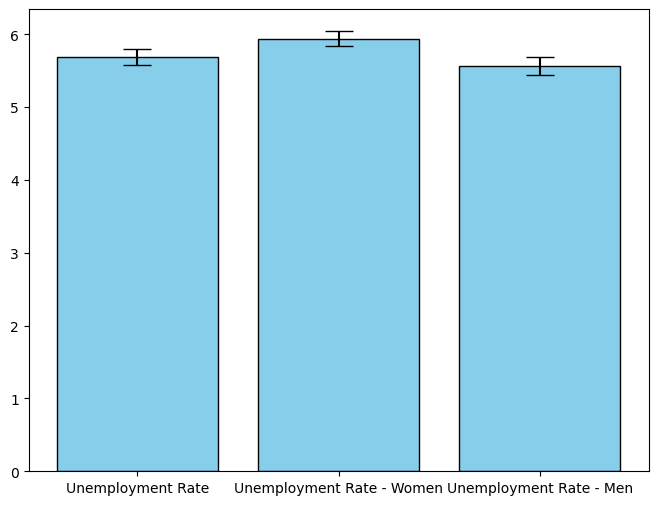

In [16]:
import matplotlib.pyplot as plt

def compute_ci(data, confidence=0.95):
    mean = np.mean(data)
    sem = stats.sem(data) 
    h = sem * stats.t.ppf((1 + confidence) / 2., len(data)-1)
    return mean, mean - h, mean + h

means = []
ci_lower = []
ci_upper = []

for ur in df_gen.columns:
    mean, lower, upper = compute_ci(df_gen[ur])
    means.append(mean)
    ci_lower.append(lower)
    ci_upper.append(upper)

plt.figure(figsize=(8, 6))
plt.bar(df_gen.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

<BarContainer object of 3 artists>

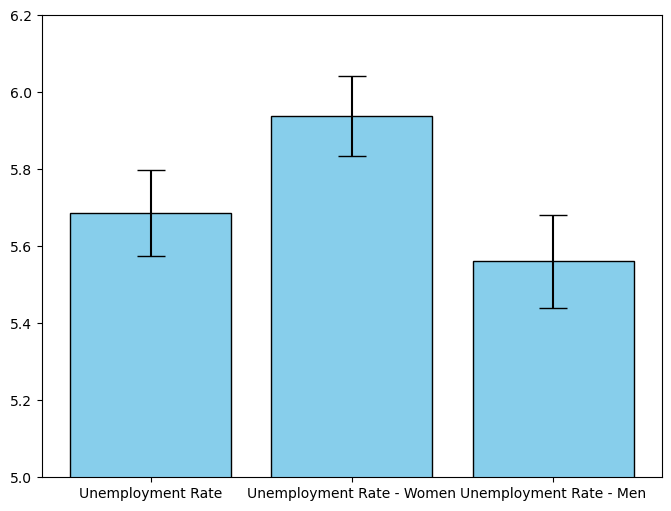

In [17]:
plt.figure(figsize=(8, 6))
plt.ylim(5,6.2)
plt.bar(df_gen.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

Discriminating Factors: Race

In [19]:
print(stats.kruskal(unrate_nsa, black, hispanic, white))
print(stats.mannwhitneyu(black,hispanic))
print(stats.mannwhitneyu(black,white))
print(stats.mannwhitneyu(hispanic,white))

KruskalResult(statistic=1502.7047225145973, pvalue=0.0)
MannwhitneyuResult(statistic=293437.5, pvalue=1.3231761023865855e-51)
MannwhitneyuResult(statistic=519235.5, pvalue=1.6991594776133588e-205)
MannwhitneyuResult(statistic=454900.5, pvalue=2.2828030137005104e-125)


These results suggest there are clear differences between the unemployment rates for races in the US since 1972

In [21]:
df_race = pd.concat([unrate_nsa, black, hispanic, white], axis=1)
df_race.columns = ['Unemployment Rate', 'Unemployment Rate - Black', 'Unemployment Rate - Hispanic', 'Unemployment Rate - White']
df_race = df_race.dropna()

<BarContainer object of 4 artists>

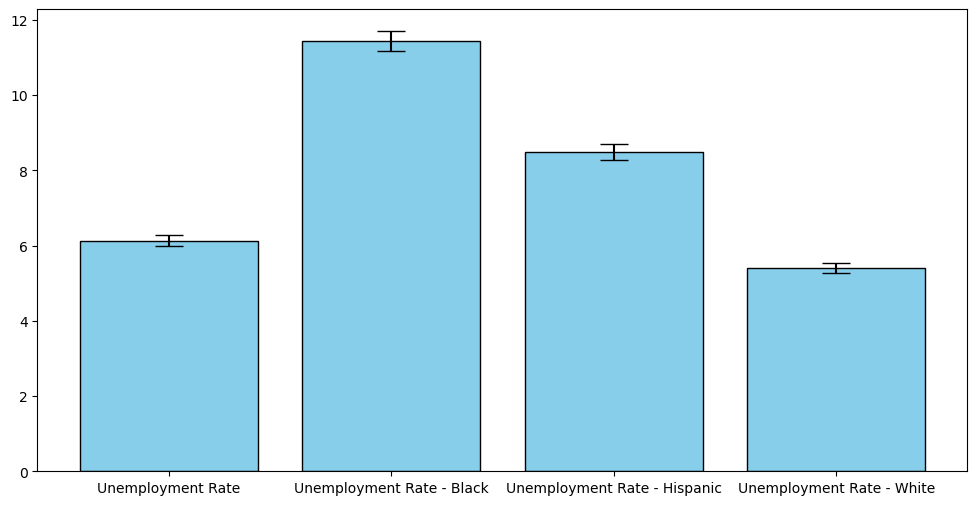

In [22]:
means = []
ci_lower = []
ci_upper = []

for ur in df_race.columns:
    mean, lower, upper = compute_ci(df_race[ur])
    means.append(mean)
    ci_lower.append(lower)
    ci_upper.append(upper)

plt.figure(figsize=(12, 6))
plt.bar(df_race.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

<BarContainer object of 4 artists>

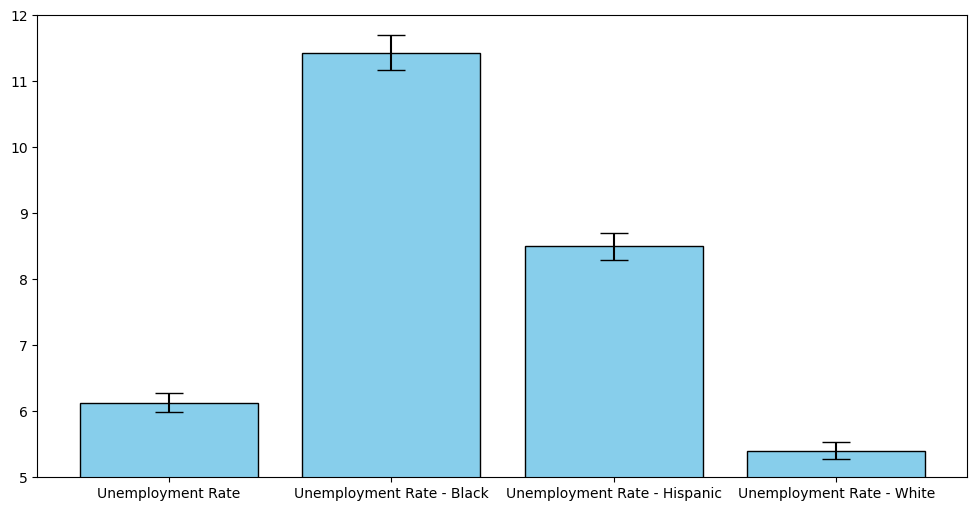

In [23]:
plt.figure(figsize=(12, 6))
plt.ylim(5,12)
plt.bar(df_race.columns, means, yerr=[np.array(means) - np.array(ci_lower), np.array(ci_upper) - np.array(means)],
        capsize=10, color='skyblue', edgecolor='black')

In [24]:
ur_m = np.array([])
ur_s = np.array([])
urw_m = np.array([])
urw_s = np.array([])
urm_m = np.array([])
urm_s = np.array([])

#Gathering mean and standard deviation for each year
for i in range(1948,2025):
    ur = df_gen[df_gen.index.year==i]['Unemployment Rate']
    urw = df_gen[df_gen.index.year==i]['Unemployment Rate - Women']
    urm = df_gen[df_gen.index.year==i]['Unemployment Rate - Men']
    ur_m = np.append(ur_m,ur.mean())
    ur_s = np.append(ur_s,ur.std())
    urw_m = np.append(urw_m,urw.mean())
    urw_s = np.append(urw_s,urw.std())
    urm_m = np.append(urm_m,urm.mean())
    urm_s = np.append(urm_s,urm.std())

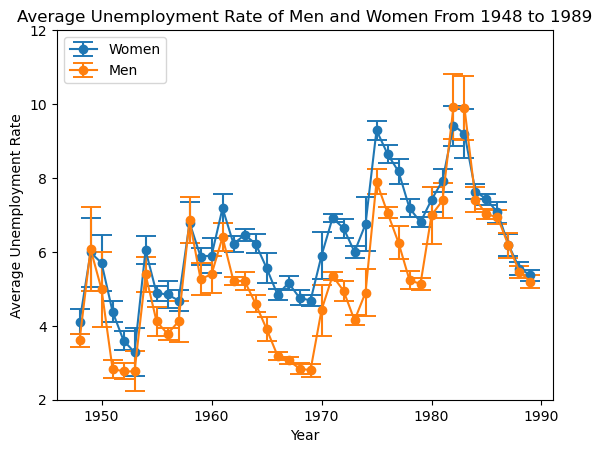

In [25]:
fig, ax = plt.subplots()

years = np.arange(1948,1990)

#ax.errorbar(years,ur_m[0:len(years)],yerr=ur_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='UR')
ax.errorbar(years,urw_m[0:len(years)],yerr=urw_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Women')
ax.errorbar(years,urm_m[0:len(years)],yerr=urm_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Men')

plt.ylim(2,12)
ax.set_title('Average Unemployment Rate of Men and Women From 1948 to 1989')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()

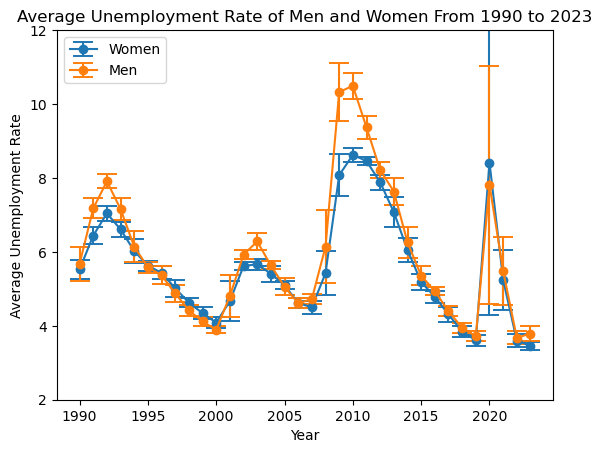

In [26]:
fig, ax = plt.subplots()

years = np.arange(1990,2024)

#ax.errorbar(years,ur_m[0:len(years)],yerr=ur_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='UR')
ax.errorbar(years,urw_m[42:-1],yerr=urw_s[42:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Women')
ax.errorbar(years,urm_m[42:-1],yerr=urm_s[42:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Men')

plt.ylim(2,12)
ax.set_title('Average Unemployment Rate of Men and Women From 1990 to 2023')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()

In [27]:
urbl_m = np.array([])
urbl_s = np.array([])
urhi_m = np.array([])
urhi_s = np.array([])
urwh_m = np.array([])
urwh_s = np.array([])

for i in range(1972,2025):
    urbl = df_race[df_race.index.year==i]['Unemployment Rate - Black']
    urhi = df_race[df_race.index.year==i]['Unemployment Rate - Hispanic']
    urwh = df_race[df_race.index.year==i]['Unemployment Rate - White']
    urbl_m = np.append(urbl_m,urbl.mean())
    urbl_s = np.append(urbl_s,urbl.std())
    urhi_m = np.append(urhi_m,urhi.mean())
    urhi_s = np.append(urhi_s,urhi.std())
    urwh_m = np.append(urwh_m,urwh.mean())
    urwh_s = np.append(urwh_s,urwh.std())

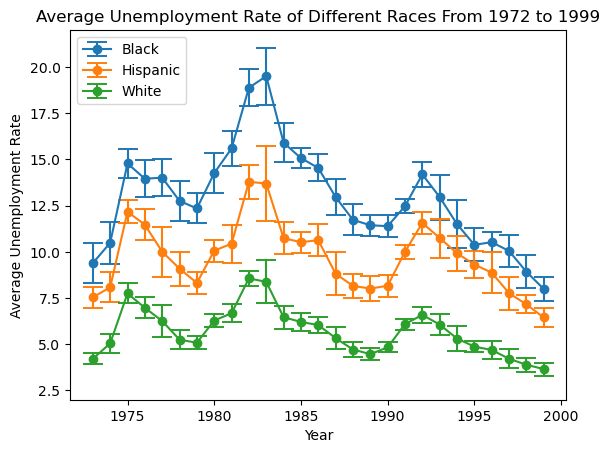

In [28]:
fig, ax = plt.subplots()

years = np.arange(1972,2000)

ax.errorbar(years,urbl_m[0:len(years)],yerr=urbl_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Black')
ax.errorbar(years,urhi_m[0:len(years)],yerr=urhi_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Hispanic')
ax.errorbar(years,urwh_m[0:len(years)],yerr=urwh_s[0:len(years)],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='White')

plt.ylim(2,22)
ax.set_title('Average Unemployment Rate of Different Races From 1972 to 1999')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()

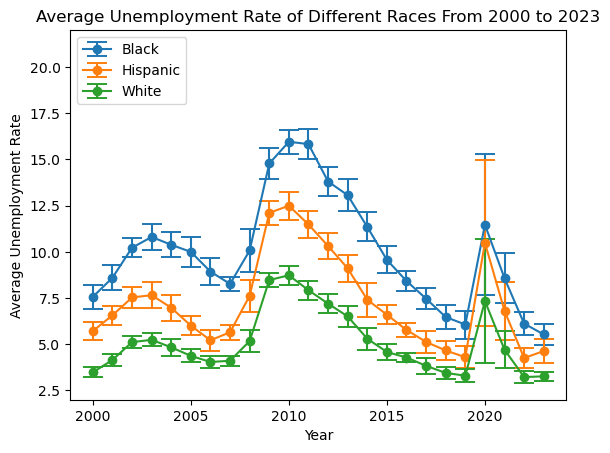

In [29]:
fig, ax = plt.subplots()

years = np.arange(2000,2024)

ax.errorbar(years,urbl_m[28:-1],yerr=urbl_s[28:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Black')
ax.errorbar(years,urhi_m[28:-1],yerr=urhi_s[28:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='Hispanic')
ax.errorbar(years,urwh_m[28:-1],yerr=urwh_s[28:-1],fmt='-o',solid_capstyle='projecting', capsize=7, capthick =1.4, label='White')

plt.ylim(2,22)
ax.set_title('Average Unemployment Rate of Different Races From 2000 to 2023')
ax.set_ylabel('Average Unemployment Rate')
ax.set_xlabel("Year")

ax.legend(loc="upper left")
plt.show()